<a href="https://colab.research.google.com/github/jchpabon/Machine-Learning/blob/main/StockPrediction/NeuralProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#pip install neuralprophet


In [29]:
#pip install yfinance

In [30]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt





In [31]:
ticker = 'NVDA'
start_date = '2018-01-01'
end_date = '2024-01-08'

data = yf.download(ticker,start=start_date,end=end_date)

print(data)
data.to_csv('data.csv')

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   48.945000   49.875000   48.625000   49.837502   49.312794   
2018-01-03   51.025002   53.424999   50.937500   53.117500   52.558254   
2018-01-04   53.939999   54.512501   53.172501   53.397499   52.835312   
2018-01-05   53.547501   54.227501   52.770000   53.849998   53.283039   
2018-01-08   55.099998   56.250000   54.645000   55.500000   54.915676   
...                ...         ...         ...         ...         ...   
2023-12-29  498.130005  499.970001  487.510010  495.220001  495.220001   
2024-01-02  492.440002  492.950012  475.950012  481.679993  481.679993   
2024-01-03  474.850006  481.839996  473.200012  475.690002  475.690002   
2024-01-04  477.670013  485.000000  475.079987  479.980011  479.980011   
2024-01-05  484.619995  495.470001  483.059

In [32]:
stock = pd.read_csv('data.csv')
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1513 non-null   object 
 1   Open       1513 non-null   float64
 2   High       1513 non-null   float64
 3   Low        1513 non-null   float64
 4   Close      1513 non-null   float64
 5   Adj Close  1513 non-null   float64
 6   Volume     1513 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.9+ KB


In [33]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1513 non-null   datetime64[ns]
 1   Open       1513 non-null   float64       
 2   High       1513 non-null   float64       
 3   Low        1513 non-null   float64       
 4   Close      1513 non-null   float64       
 5   Adj Close  1513 non-null   float64       
 6   Volume     1513 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.9 KB


In [34]:
stock = stock[['Date','Close']]
stock

,Date,Close
0,2018-01-02,49.837502
1,2018-01-03,53.117500
2,2018-01-04,53.397499
3,2018-01-05,53.849998
4,2018-01-08,55.500000
...,...,...
1508,2023-12-29,495.220001
1509,2024-01-02,481.679993
1510,2024-01-03,475.690002
1511,2024-01-04,479.980011


In [35]:
stock.columns = ['ds','y']
stock

,ds,y
0,2018-01-02,49.837502
1,2018-01-03,53.117500
2,2018-01-04,53.397499
3,2018-01-05,53.849998
4,2018-01-08,55.500000
...,...,...
1508,2023-12-29,495.220001
1509,2024-01-02,481.679993
1510,2024-01-03,475.690002
1511,2024-01-04,479.980011


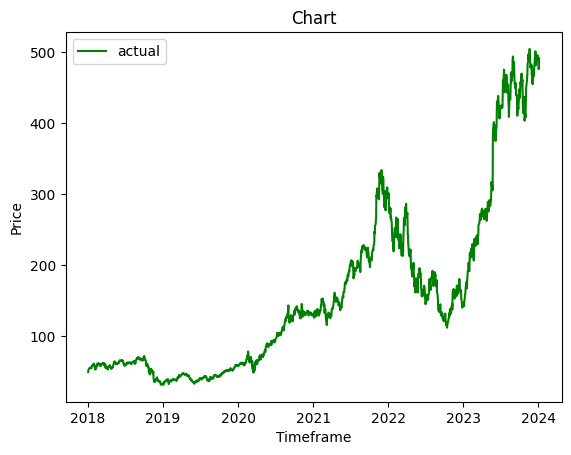

In [36]:
plt.plot(stock['ds'],stock['y'],label='actual', c='g')
plt.xlabel('Timeframe')
plt.ylabel('Price')
plt.title('Chart')
plt.legend()
plt.show()


**Training**


In [37]:
model = NeuralProphet()
model.fit(stock)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.233% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.233% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.co

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,814.341980,1010.355713,1.213983,0.0,0
1,785.588928,979.785889,1.162605,0.0,1
2,746.603577,933.915710,1.093761,0.0,2
3,701.459656,886.827454,1.011466,0.0,3
4,635.038330,814.840271,0.892975,0.0,4
...,...,...,...,...,...
166,22.516174,28.507841,0.002029,0.0,166
167,22.581038,28.544146,0.002033,0.0,167
168,22.535957,28.403923,0.002024,0.0,168
169,22.632990,28.537020,0.002045,0.0,169


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.233% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.233% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.233% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.233% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


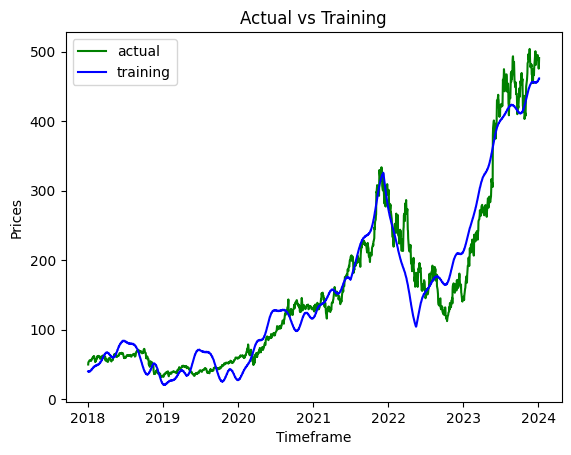

In [38]:
actual_prediction = model.predict(stock)

plt.plot(stock['ds'],stock['y'],label='actual', c='g')
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],label='training', c='b')
plt.xlabel('Timeframe')
plt.ylabel('Prices')
plt.title('Actual vs Training')
plt.legend()
plt.show()

**Modeling**


In [39]:
#Generating a DateFrame of 300 points in the future
future = model.make_future_dataframe(stock, periods=300)
#Prediciting prices for DateFrame created
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.233% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.233% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [40]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2024-01-08,None,464.314880,401.724915,-31.916153,94.506142
1,2024-01-09,None,465.377960,402.400970,-31.644505,94.621445
2,2024-01-10,None,466.289551,403.076843,-31.333858,94.546577
3,2024-01-11,None,467.944031,403.752838,-30.987106,95.178314
4,2024-01-12,None,468.242828,404.428802,-30.607309,94.421349
...,...,...,...,...,...,...
295,2025-02-24,None,762.271973,680.893738,-13.127888,94.506142
296,2025-02-25,None,763.512329,681.569702,-12.678784,94.621445
297,2025-02-26,None,764.587402,682.245667,-12.204865,94.546577
298,2025-02-27,None,766.394470,682.921631,-11.705528,95.178314


In [41]:
forecast[['ds','yhat1']]

,ds,yhat1
0,2024-01-08,464.314880
1,2024-01-09,465.377960
2,2024-01-10,466.289551
3,2024-01-11,467.944031
4,2024-01-12,468.242828
...,...,...
295,2025-02-24,762.271973
296,2025-02-25,763.512329
297,2025-02-26,764.587402
298,2025-02-27,766.394470


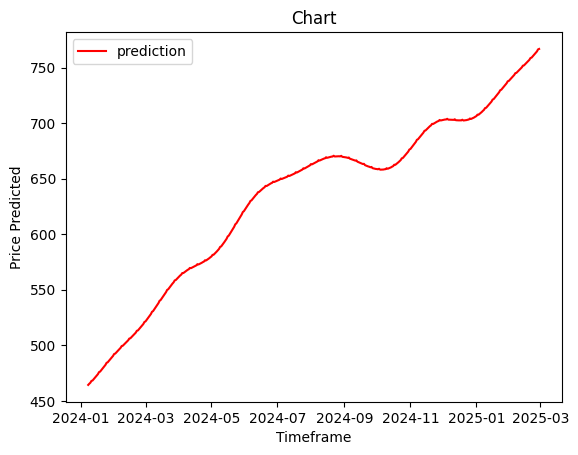

In [42]:
plt.plot(forecast['ds'],forecast['yhat1'],label='prediction', c='r')
plt.xlabel('Timeframe')
plt.ylabel('Price Predicted')
plt.title('Chart')
plt.legend()
plt.show()

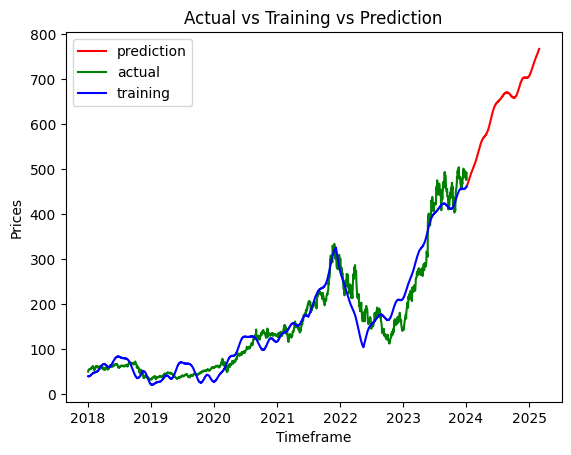

In [43]:
plt.plot(forecast['ds'],forecast['yhat1'],label='prediction', c='r')
plt.plot(stock['ds'],stock['y'],label='actual', c='g')
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],label='training', c='b')
plt.xlabel('Timeframe')
plt.ylabel('Prices')
plt.title('Actual vs Training vs Prediction')
plt.legend()
plt.show()